In [66]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

Your Name and PRN:
- Name: Viraj Patil
- PRN : 230940128038

# Deep Neural Networks 
## Assignment 02


## Implement Perceptron with sigmoid activation function


In [67]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
 
%matplotlib inline

In [68]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE)
NOISE = 0.2
EPOCHS = 2000  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

In [69]:
x, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)

x.shape, y.shape

((1000, 2), (1000,))

In [70]:
data_df= pd.DataFrame(x, columns=['A', 'B'])
data_df['target']=y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [71]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [72]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,1000.0,0.490841,0.898951,-1.688795,-0.149565,0.500100,1.095048,2.419113
B,1000.0,0.239025,0.540082,-0.955280,-0.205090,0.241163,0.680394,1.612075
target,1000.0,0.500000,0.500250,0.000000,0.000000,0.500000,1.000000,1.000000


In [73]:
data_df['target'].unique()

array([0, 1])

<Axes: xlabel='A', ylabel='B'>

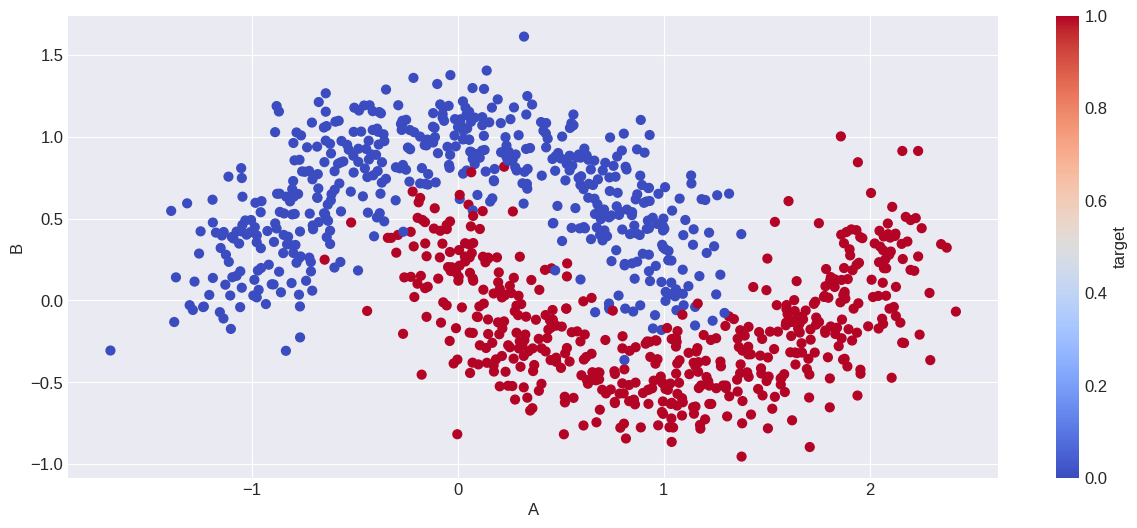

In [74]:
data_df.plot.scatter('A','B', s=40, c='target', cmap=CMAP) # type: ignore

<Axes: xlabel='target', ylabel='count'>

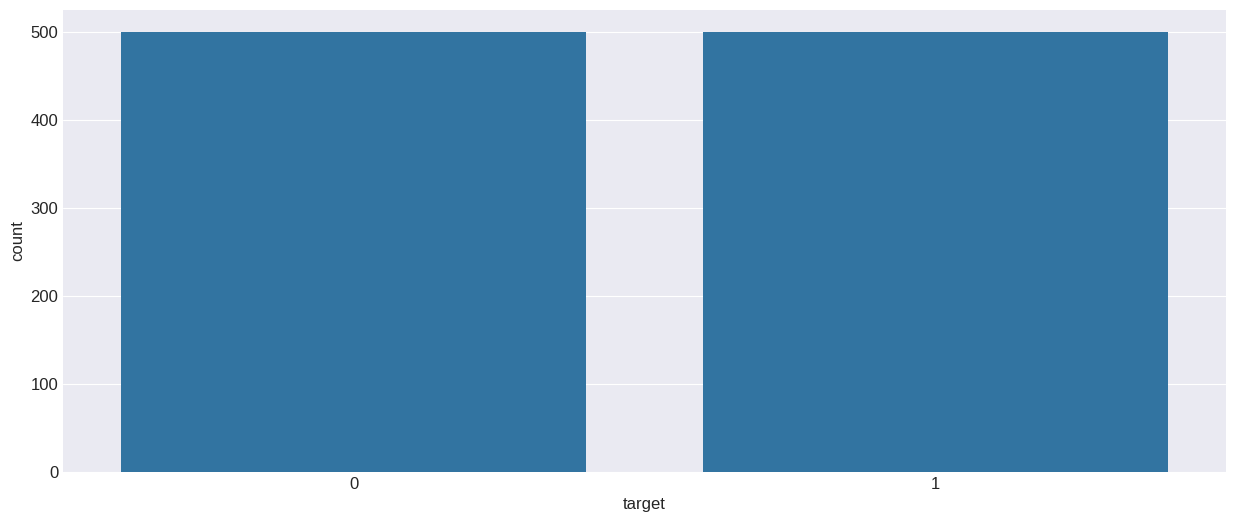

In [75]:
sns.barplot(data_df['target'].value_counts())

<Axes: xlabel='A', ylabel='B'>

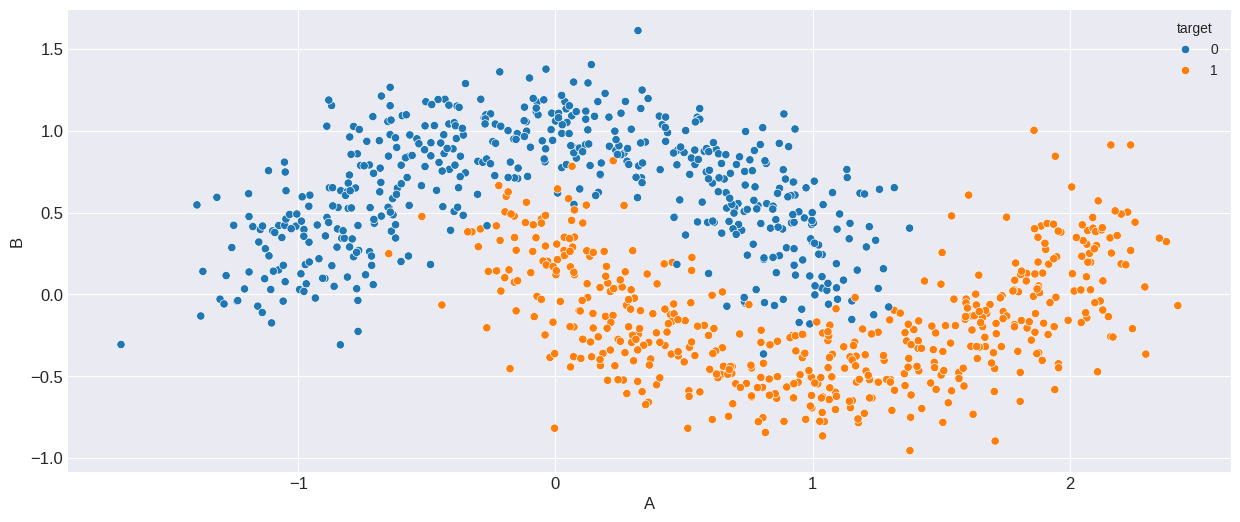

In [76]:
sns.scatterplot(data_df, x='A',y= 'B', hue='target')

In [77]:
data_train = data_df.to_numpy()[:900]
data_test = data_df.to_numpy()[900:]
data_train.shape, data_test.shape

((900, 3), (100, 3))

In [78]:
def fn_sigmoid(z):
    return 1/(1+np.exp(-z))

In [79]:
fn_sigmoid(np.array([-np.inf, 0 ,0.5, 1, np.inf]))

array([0.        , 0.5       , 0.62245933, 0.73105858, 1.        ])

In [80]:
# A function to make predictions
def predict(row, wt):
    z= wt[0]
    for i in range(len(row)-1):
        z = wt[i+1]*row[i]+z
        
    return fn_sigmoid(z)

In [81]:
#Unit test
weights = np.array([0.1, 2.0, 1.0])

display(data_df.loc[0])

predict(data_df.loc[0].values, weights)

A         0.906340
B         0.902676
target    0.000000
Name: 0, dtype: float64

0.9434999754763397

In [82]:
# Function to train the model
def train_weights(train, alpha=ALPHA, n_epoch=EPOCHS):
    errors=[]
    weights = rng.random(train.shape[1])
    
    m= train.shape[0]
    
    for epoch in range(n_epoch):
        
        sum_error = 0
        
        for row in train:
            prediction = predict(row, weights)
            
            dz= (prediction - row[-1])
            
            error =  - row[-1]*(np.log(prediction)) # changes due to sigmoid function
            sum_error += error
            
            weights[0]= weights[0]-alpha*dz/m
            
            for i in range(len(row)-1):
                weights[i+1]-= alpha*dz*row[i]/m
        
        errors.append(sum_error/m )
    
    return errors, weights

In [83]:
# calling 'train_weight'

errors, weights = train_weights(data_train, ALPHA, EPOCHS)

print(weights)

[ 0.45061204  1.1780861  -4.36266389]


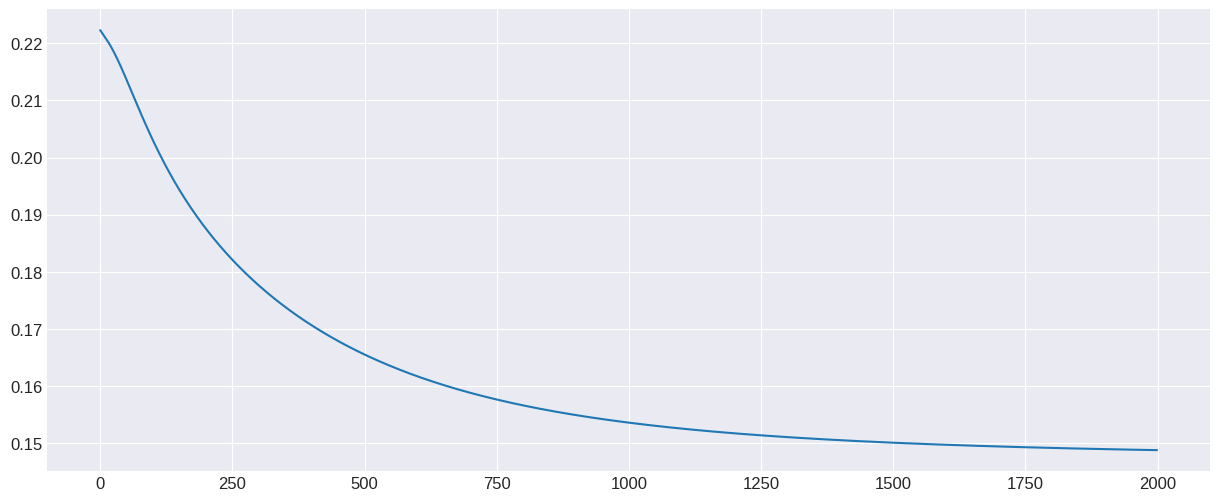

In [84]:
fig, ax= plt.subplots()
ax.plot(errors)

In [85]:
predictions=[] #LIST

for row in data_train:  #iterate ove all rows
    
    prediction = predict(row, weights) #make prediction
    
    if prediction > 0.5:
        y_pred =1
    else:
        y_pred = 0
        
    predictions.append(y_pred) # collect them in a list

In [86]:
accuracy_score(data_train[:,-1],predictions) #calculate accuracy

0.8655555555555555

In [87]:
predictions=[] #LIST

for row in data_test:  #iterate ove all rows
    prediction = predict(row, weights) #make prediction
    
    if prediction > 0.5:
        y_pred = 1
    else:
        y_pred = 0
        
    predictions.append(y_pred) # collect them in a list

In [88]:
accuracy_score(data_test[:,-1],predictions) #calculate accuracy

0.9

In [89]:
cm = confusion_matrix(data_test[:,-1],predictions)
cm

array([[55,  3],
       [ 7, 35]])

<Figure size 600x600 with 0 Axes>

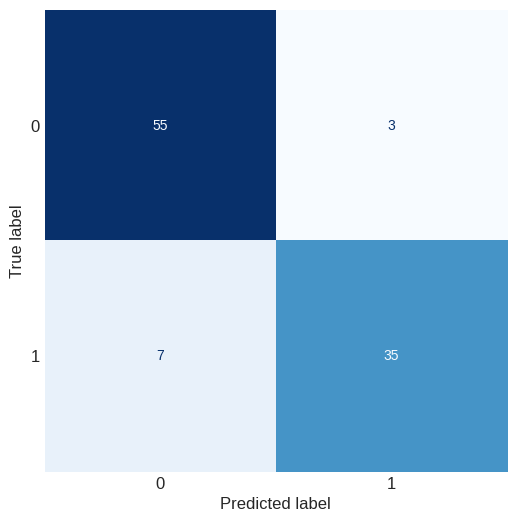

In [90]:
fig.ax =plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot(cmap = 'Blues', colorbar=False)

plt.grid()

In [106]:
def fn_plot_decision_boundary(X_tr :  np.ndarray, X_ts:  np.ndarray, wts:  np.ndarray = weights):
    
    fig, ax = plt.subplots()
    
    dm = 0.05
    
    x_min, x_max = X_tr[:, 0].min() - 0.5, X_tr[:, 0].max() + 0.5
    
    y_min, y_max = X_tr[:, 1].min() - 0.5, X_tr[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), np.arange(y_min, y_max, dm))
    
    XX = np.c_[xx.ravel(), yy.ravel()]

    XX = np.hstack( ( XX, np.ones((XX.shape[0],1)) ) )
    
    y_pred = []
    
    for row in (XX):

        ###-----------------------
        ### Changes due to Sigmoid
        ###-----------------------
        a = predict(row, wts)
        
        y_p = 0
        
        if a >= 0.5 : y_p = 1
            
        y_pred.append(y_p)
        
    Z = np.array(y_pred).reshape(xx.shape)

    # Plotting contours for data as per testing
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    
    # Plotting scatter for train data
    ax.scatter(X_tr[:, 0], X_tr[:, 1], c=X_tr[:, 2], edgecolor='k', cmap=plt.cm.coolwarm)
    
    
    # Plotting scatter for test data
    ax.scatter(X_ts[:, 0], X_ts[:, 1], c=X_ts[:, 2], edgecolor='k', cmap=plt.cm.inferno )

    ax.set_title('Decision Boundary')

    ax.set_xlabel('A')
    
    ax.set_ylabel('B')
    
    plt.show()

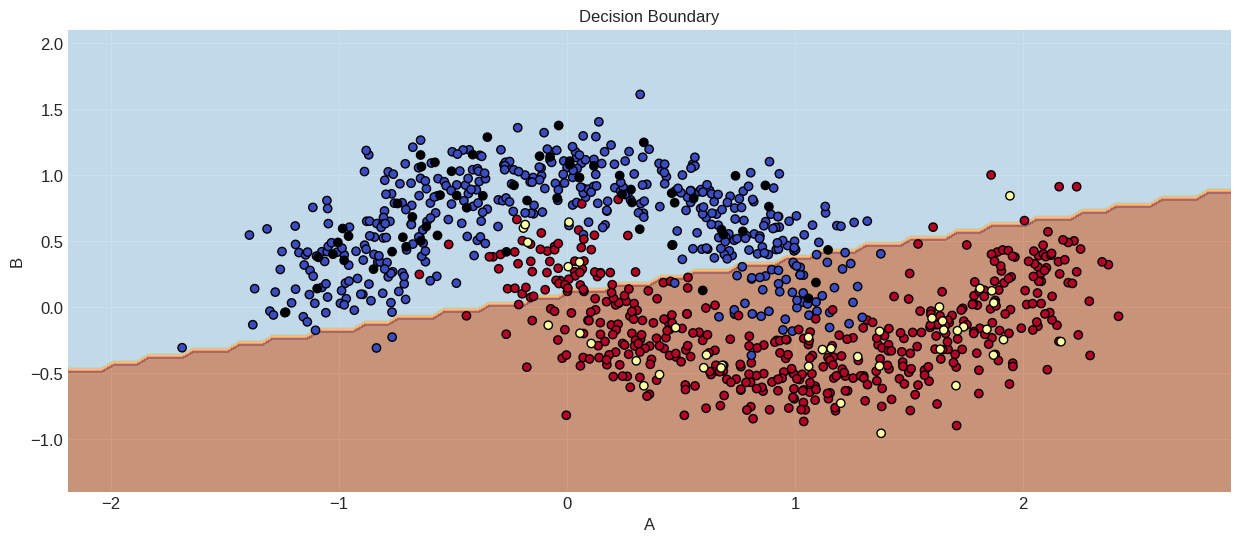

In [107]:
fn_plot_decision_boundary(data_train, data_test)